<hr style="margin-bottom: 50px;">
<center>
    <h1 style="margin-top: 0; margin-bottom: 0;">
        <b><u>Gradient Boosting</u></b>
    </h1>
</center>
<hr style="margin-top: 50px;">


In [2]:
import config, src

import numpy as np

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.utils.class_weight import compute_class_weight

In [3]:
data = src.load_data(config.PROCESSED_DATA_COMBINED_RAP_HIPHOP_FILE)

X_train, X_test, y_train, y_test = src.split_data(data, target_column='music_genre')

class_weight = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train,
)
class_weight = dict(zip(np.unique(y_train), class_weight))

Données chargées avec succès.


In [39]:
hgb_classifier = HistGradientBoostingClassifier(random_state=0, class_weight=class_weight)
hgb_classifier.fit(X_train,y_train)

HistGradientBoostingClassifier(class_weight={np.int64(0): np.float64(1.0701870734201),
                                             np.int64(1): np.float64(1.0715194776449757),
                                             np.int64(2): np.float64(1.0766130153170432),
                                             np.int64(3): np.float64(1.077421688087687),
                                             np.int64(4): np.float64(1.0980408834453232),
                                             np.int64(5): np.float64(1.0641004505989669),
                                             np.int64(6): np.float64(1.0741942641593165),
                                             np.int64(7): np.float64(0.6427516388681437),
                                             np.int64(8): np.float64(1.06594555913357)},
                               random_state=0)

----------------------------------------------------------------------------------------------------

Global accuracy : 0.712898894970567
Global log loss : 0.8010436655075378
Global precision : 0.7047973077508495
Global recall : 0.7011547710170764
Global F1 score : 0.7011770565847346
Global ROC-AUC score : 0.9530021662234378

              Precision    Recall  F1 score
Alternative   0.518640  0.483146  0.500264
Anime         0.816770  0.801829  0.809231
Blues         0.678375  0.616152  0.645768
Classical     0.888438  0.870775  0.879518
Country       0.686449  0.641998  0.663480
Electronic    0.719337  0.680962  0.699624
Jazz          0.629555  0.625755  0.627649
Rap/Hip-Hop   0.856315  0.860804  0.858554
Rock          0.549296  0.728972  0.626506

----------------------------------------------------------------------------------------------------


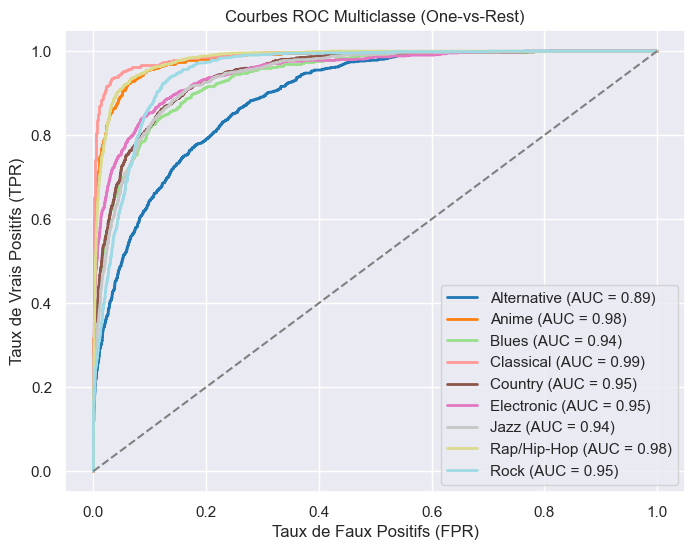

----------------------------------------------------------------------------------------------------


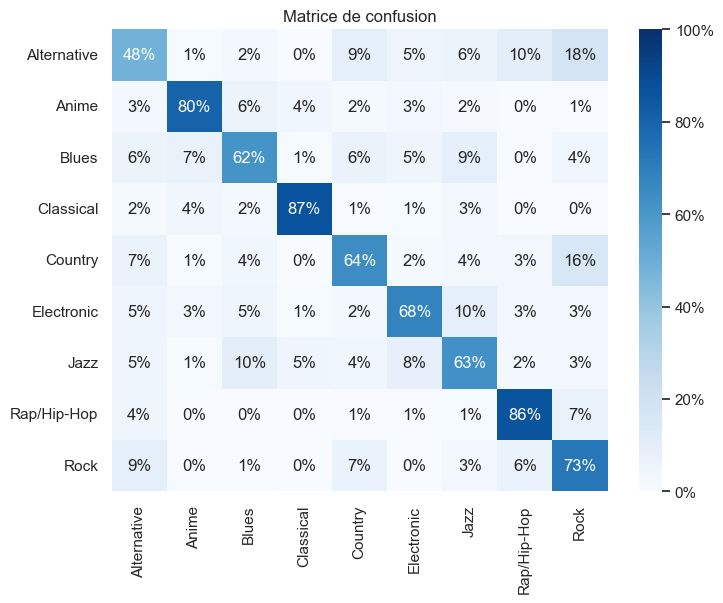

----------------------------------------------------------------------------------------------------


In [40]:
src.evaluate_model(hgb_classifier, X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP)

In [2]:
params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 200, 300],
    'max_leaf_nodes': [15, 31, 63],
    'min_samples_leaf': [20, 30, 50],
    'l2_regularization': [0, 1, 10]
}

In [42]:
cv_strat = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

rs_hgb_classifier = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=0, class_weight=class_weight),
    param_distributions=params,
    n_iter=150,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv_strat,
    verbose=1,
    random_state=0,
    )
rs_hgb_classifier.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


/Users/lucascaio/Desktop/Fac/Master/M2/Bloc de base/Apprentissage statistique/music-genre-prediction/venv/lib/python3.9/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=HistGradientBoostingClassifier(class_weight={np.int64(0): np.float64(1.0701870734201),
                                                                          np.int64(1): np.float64(1.0715194776449757),
                                                                          np.int64(2): np.float64(1.0766130153170432),
                                                                          np.int64(3): np.float64(1.077421688087687),
                                                                          np.int64(4): np.float64(1.0980408834453232),
                                                                          np.int...
                                                                          np.int64(6): np.float64(1.0741942641593165),
                                                                          np.int64(7): np.float64(0.6427516388681437),
                                                                          np.int64(8): np.float64(1.06594555913357)},
                                                            random_state=0),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'l2_regularization': [0, 1, 10],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_iter': [100, 200, 300],
                                        'max_leaf_nodes': [15, 31, 63],
                                        'min_samples_leaf': [20, 30, 50]},
                   random_state=0, scoring='accuracy', verbose=1)

In [43]:
src.save_model(rs_hgb_classifier, 'rs_hgb_classifier')

Modèle et ses métadonnées sauvegardées dans : /Users/lucascaio/Desktop/Fac/Master/M2/Bloc de base/Apprentissage statistique/music-genre-prediction/models


Meilleure valeur de min_samples_leaf : 50
Meilleure valeur de max_leaf_nodes : 15
Meilleure valeur de max_iter : 300
Meilleure valeur de learning_rate : 0.05
Meilleure valeur de l2_regularization : 10


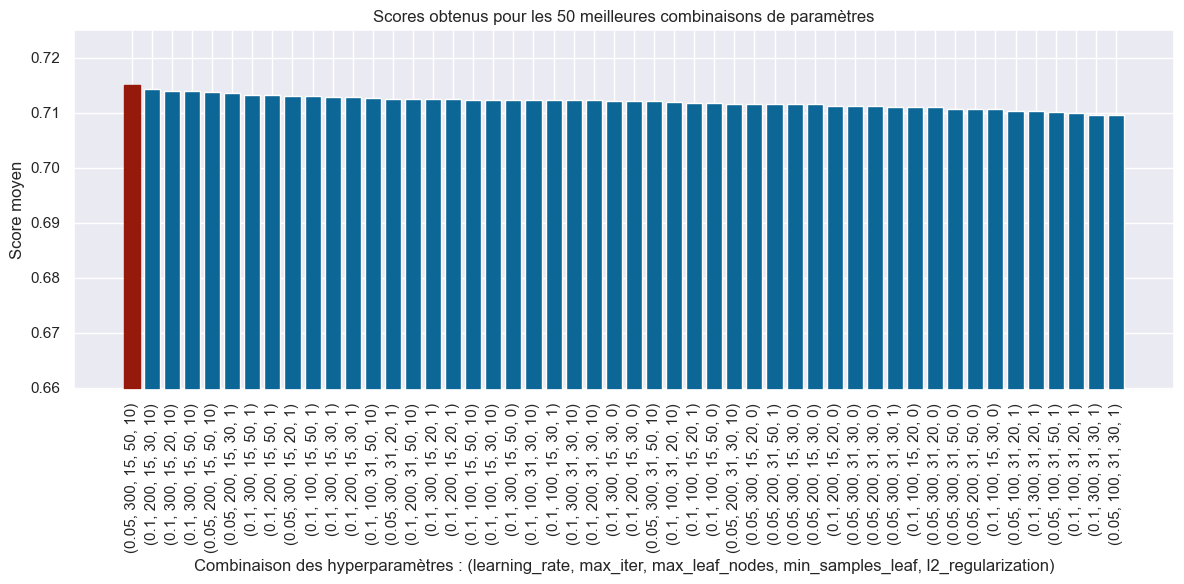

In [7]:
best_params = src.plot_gridsearch(rs_hgb_classifier, params)

In [8]:
hgb_classifier = HistGradientBoostingClassifier(
    random_state=0,
    learning_rate=best_params['learning_rate'],
    max_iter=best_params['max_iter'],
    max_leaf_nodes=best_params['max_leaf_nodes'],
    min_samples_leaf=best_params['min_samples_leaf'],
    l2_regularization=best_params['l2_regularization'],
    class_weight=class_weight,
    )
hgb_classifier.fit(X_train, y_train)

HistGradientBoostingClassifier(class_weight={np.int64(0): np.float64(1.0701870734201),
                                             np.int64(1): np.float64(1.0715194776449757),
                                             np.int64(2): np.float64(1.0766130153170432),
                                             np.int64(3): np.float64(1.077421688087687),
                                             np.int64(4): np.float64(1.0980408834453232),
                                             np.int64(5): np.float64(1.0641004505989669),
                                             np.int64(6): np.float64(1.0741942641593165),
                                             np.int64(7): np.float64(0.6427516388681437),
                                             np.int64(8): np.float64(1.06594555913357)},
                               l2_regularization=10, learning_rate=0.05,
                               max_iter=300, max_leaf_nodes=15,
                               min_samples_leaf=50, random_state=0)

----------------------------------------------------------------------------------------------------

Global accuracy : 0.7203346070432717
Global log loss : 0.7813550931974149
Global precision : 0.7134572316368469
Global recall : 0.7096041921516043
Global F1 score : 0.7094829241979693
Global ROC-AUC score : 0.9555007355250239

              Precision    Recall  F1 score
Alternative   0.533040  0.494382  0.512984
Anime         0.824451  0.801829  0.812983
Blues         0.707778  0.635095  0.669469
Classical     0.885974  0.872763  0.879319
Country       0.701980  0.655874  0.678144
Electronic    0.727273  0.694561  0.710540
Jazz          0.623260  0.630785  0.627000
Rap/Hip-Hop   0.864626  0.855562  0.860070
Rock          0.552733  0.745587  0.634836

----------------------------------------------------------------------------------------------------


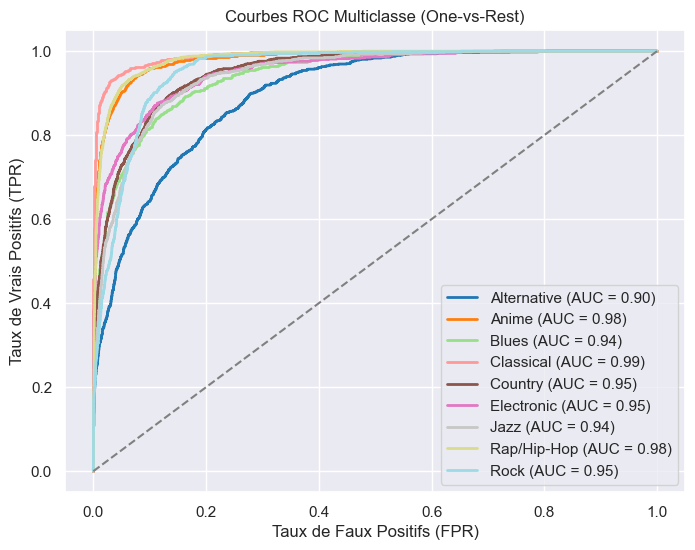

----------------------------------------------------------------------------------------------------


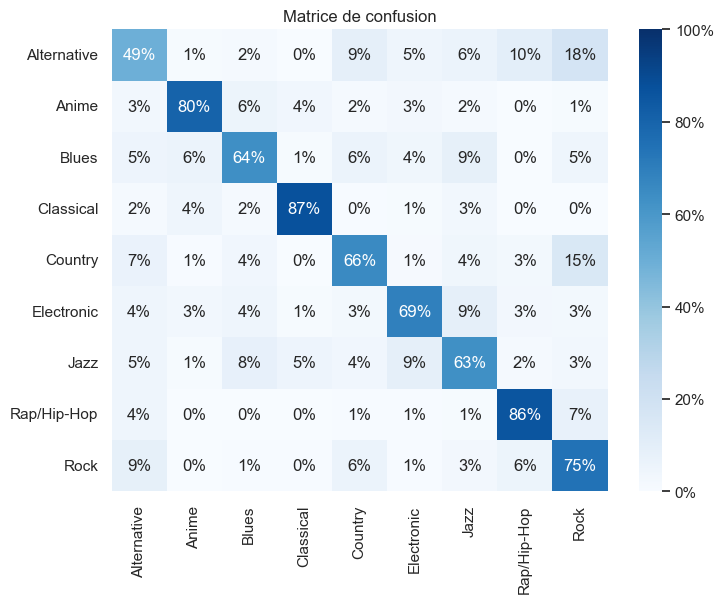

----------------------------------------------------------------------------------------------------


In [9]:
src.evaluate_model(hgb_classifier, X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP)

In [10]:
src.save_model(hgb_classifier, 'hgb_classifier')

Modèle et ses métadonnées sauvegardées dans : /Users/lucascaio/Desktop/Fac/Master/M2/Bloc de base/Apprentissage statistique/music-genre-prediction/models


---